In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import requests
import io

# آدرس فایل CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# دریافت فایل از اینترنت
response = requests.get(url)

# خواندن فایل CSV از داده‌های دریافتی
df = pd.read_csv(io.StringIO(response.text))

# نمایش ۵ ردیف اول
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


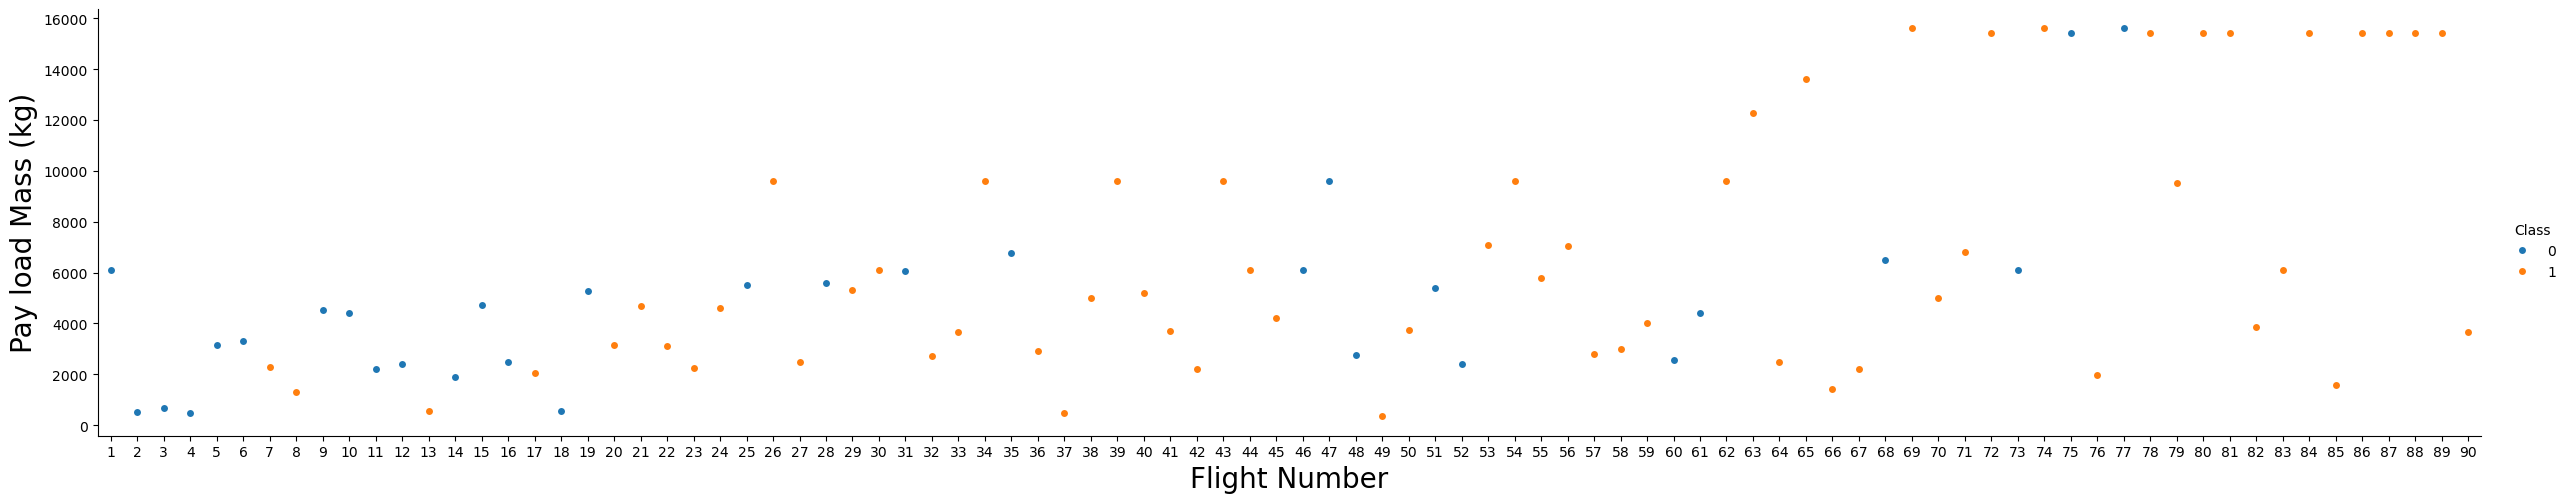

In [7]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

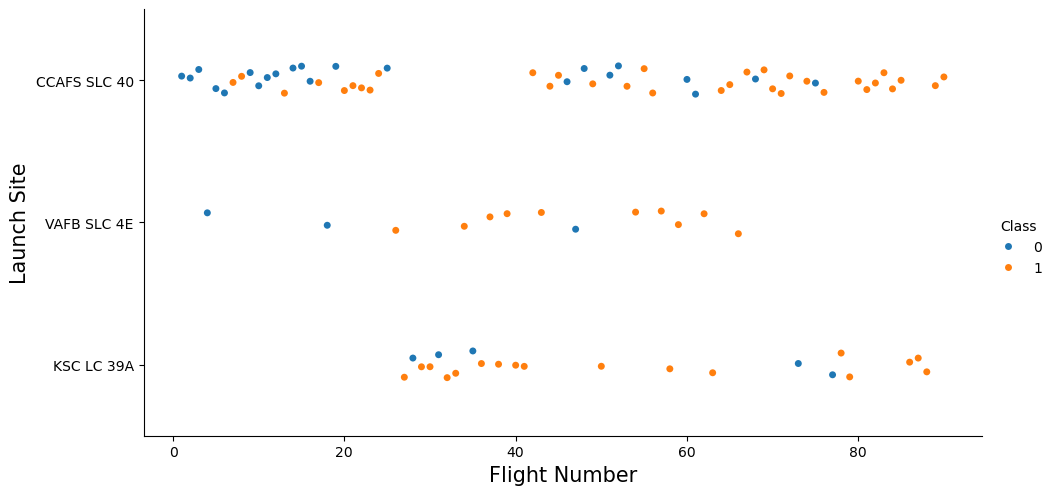

In [8]:
# وارد کردن کتابخانه‌های لازم
import seaborn as sns
import matplotlib.pyplot as plt

# رسم نمودار catplot برای نمایش رابطه بین شماره پرواز و محل پرتاب
# محور افقی (x) شماره پرواز
# محور عمودی (y) محل پرتاب (LaunchSite)
# hue رنگ نقاط را براساس موفقیت یا عدم موفقیت پرواز (class) مشخص می‌کند
# aspect=2 باعث پهن‌تر شدن نمودار می‌شود تا وضوح بیشتر داشته باشد
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)

# برچسب محور x
plt.xlabel("Flight Number", fontsize=15)

# برچسب محور y
plt.ylabel("Launch Site", fontsize=15)

# نمایش نمودار
plt.show()

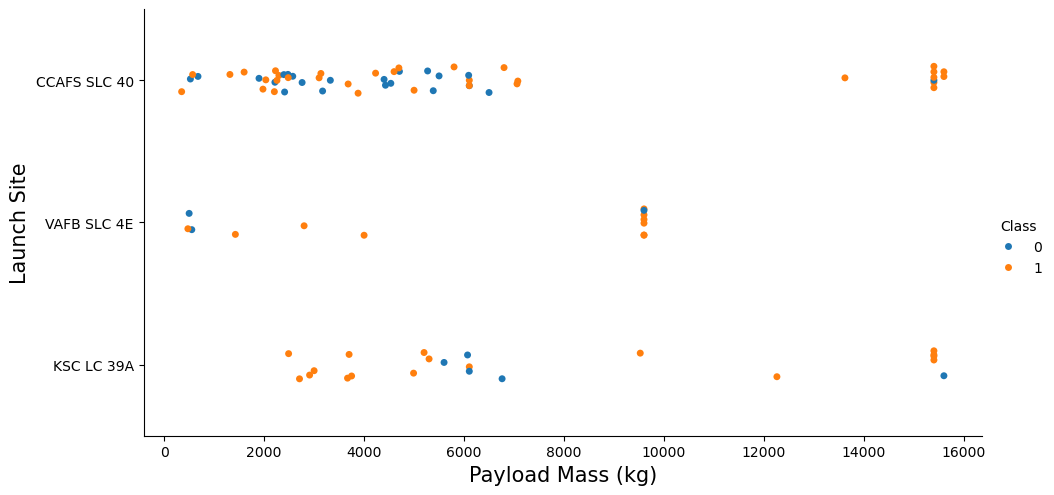

In [9]:
# وارد کردن کتابخانه‌های لازم
import seaborn as sns
import matplotlib.pyplot as plt

# رسم نمودار پراکندگی (scatter point chart) بین وزن محموله و محل پرتاب
# محور افقی (x) = وزن محموله (PayloadMass به کیلوگرام)
# محور عمودی (y) = Launch Site (محل پرتاب)
# hue = براساس مقدار کلاس (Class) رنگ متفاوت برای موفق یا ناموفق بودن پرتاب‌ها
# aspect=2 برای کشیده‌تر شدن نمودار
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)

# تنظیم عنوان محور x با فونت مناسب
plt.xlabel("Payload Mass (kg)", fontsize=15)

# تنظیم عنوان محور y با فونت مناسب
plt.ylabel("Launch Site", fontsize=15)

# نمایش نمودار
plt.show()

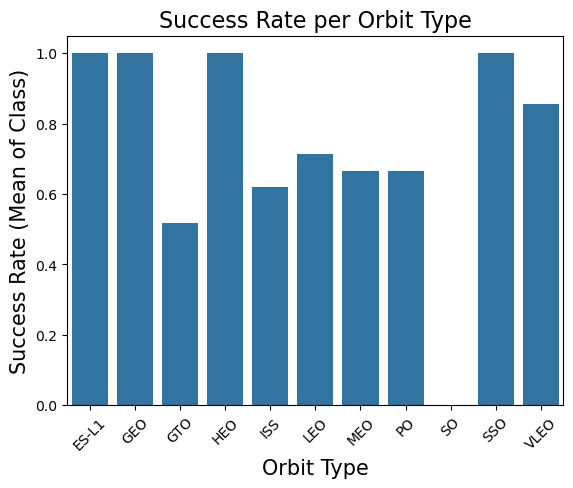

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# گروه‌بندی داده‌ها بر اساس Orbit و محاسبه میانگین موفقیت (Class)
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# رسم نمودار bar chart برای نمایش موفقیت هر نوع مدار
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)

# تنظیم عنوان محورها
plt.xlabel('Orbit Type', fontsize=15)
plt.ylabel('Success Rate (Mean of Class)', fontsize=15)
plt.title('Success Rate per Orbit Type', fontsize=16)

# نمایش نمودار
plt.xticks(rotation=45)
plt.show()

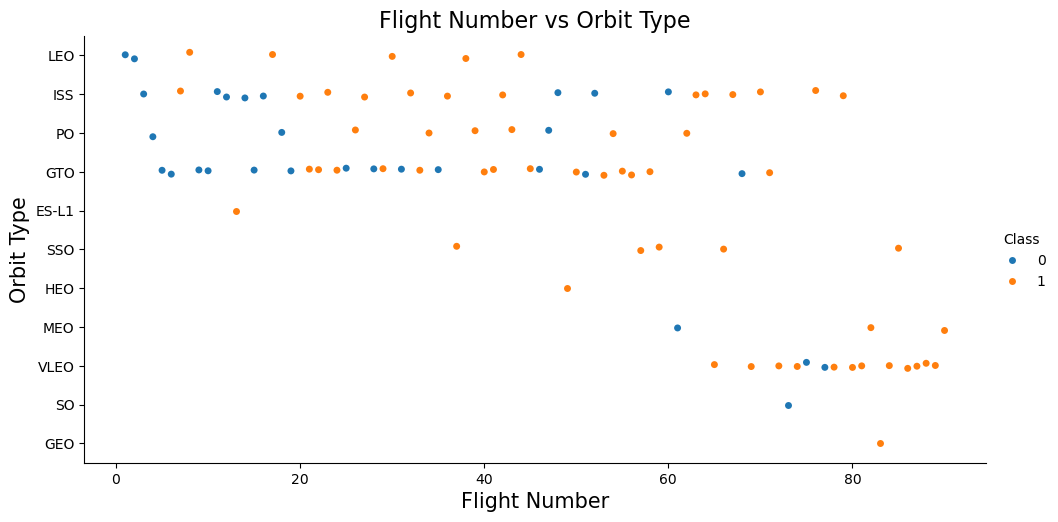

In [11]:
# رسم نمودار catplot برای نمایش رابطه بین شماره پرواز و مدار پرتاب با رنگ‌بندی براساس موفقیت
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2)

# برچسب‌گذاری محورها
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type", fontsize=16)
plt.show()

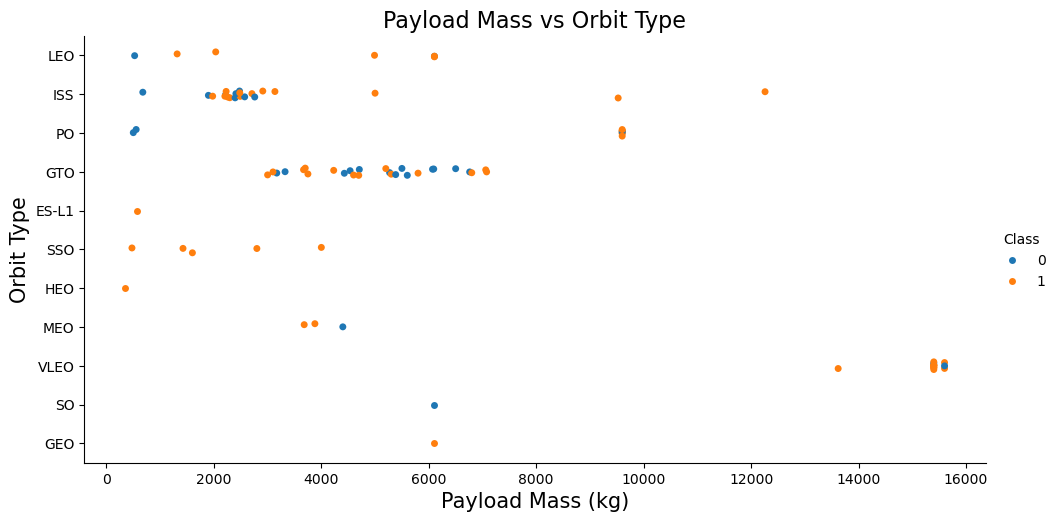

In [12]:
# رسم نمودار catplot برای نمایش رابطه بین وزن محموله و مدار با رنگ‌بندی براساس موفقیت
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=2)

# برچسب‌گذاری محورها
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type", fontsize=16)
plt.show()

In [13]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


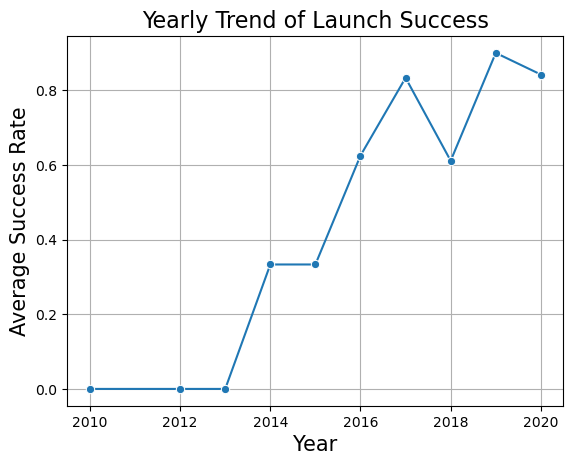

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# فرض بر این است که ستون 'Date' موجود است و فرمت آن به صورت رشته یا datetime است

# اطمینان از اینکه ستون تاریخ به فرمت datetime تبدیل شده
df['Date'] = pd.to_datetime(df['Date'])

# استخراج سال از ستون تاریخ و ذخیره در ستون جدید به نام 'Year'
df['Year'] = df['Date'].dt.year

# محاسبه میانگین موفقیت (Class) برای هر سال
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# رسم نمودار خطی برای نمایش نرخ موفقیت سالانه
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o')

# تنظیم عنوان و برچسب محورها
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.title('Yearly Trend of Launch Success', fontsize=16)

# نمایش نمودار
plt.grid(True)
plt.show()

In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [16]:
import pandas as pd

# لیستی از ستون‌هایی که باید به one-hot encoding تبدیل شوند
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# استفاده از تابع get_dummies برای تبدیل ستون‌های متنی به متغیرهای عددی باینری
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# نمایش ۵ سطر اول برای مشاهده نتیجه
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# تبدیل تمام ستون‌های دیتافریم به نوع داده float64
features_one_hot = features_one_hot.astype('float64')

# نمایش ۵ سطر اول برای تأیید تبدیل
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# ذخیره دیتافریم نهایی در فایل CSV بدون اندیس
features_one_hot.to_csv('dataset_part_3.csv', index=False)